# LeNet

### Basic Introduction

LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.


<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank">Paper: <u>Gradient-Based Learning Applied to Document Recognition</u></a>

**Authors**: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner

**Published in**: Proceedings of the IEEE (1998)

### Structure of the LeNet network

LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. Here we analyze LeNet5 in depth. At the same time, through example analysis, deepen the understanding of the convolutional layer and pooling layer.



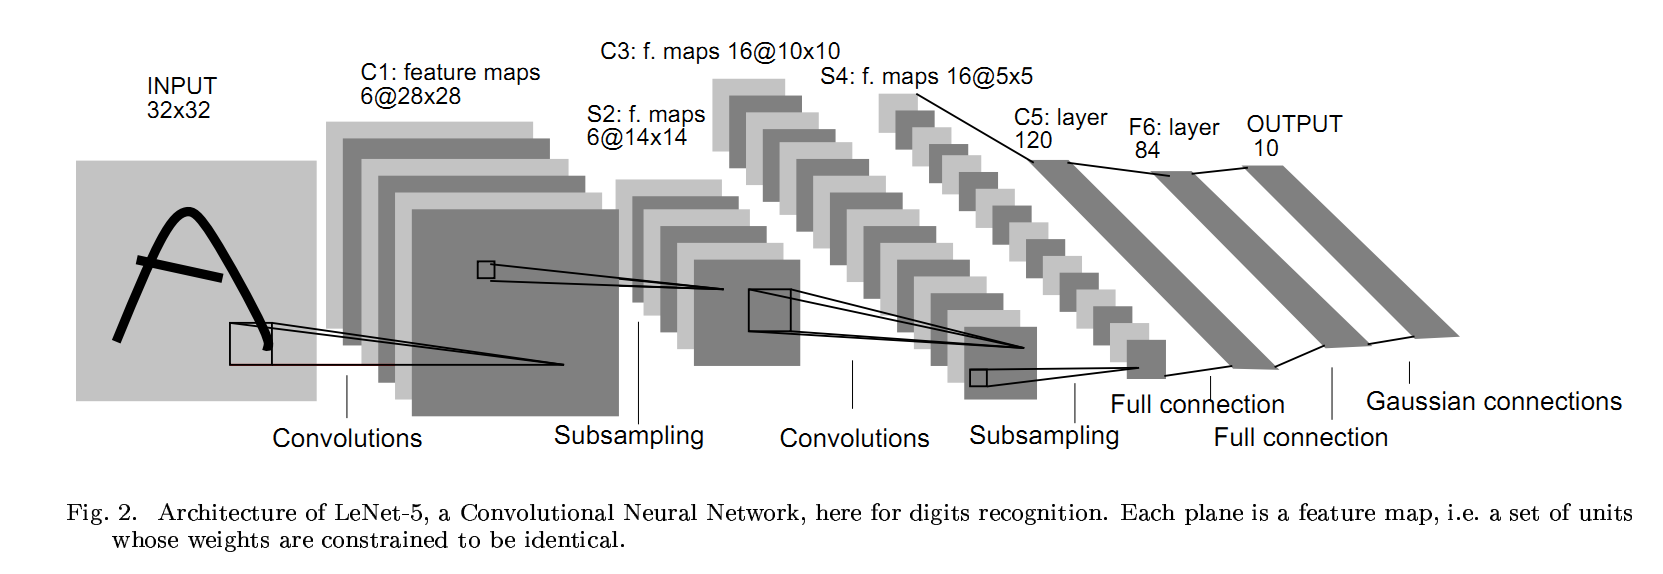

### LeNet-5 Model Code

In [23]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from tensorflow.keras.models import Sequential

# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)
# Building the Model Architecture

model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(AveragePooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(AveragePooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='tanh'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))
model.compile(loss=tensorflow.keras.metrics.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)

Epoch 1/20
469/469 [==============================] - 8s 17ms/step - loss: 0.3500 - accuracy: 0.8995 - val_loss: 0.1589 - val_accuracy: 0.9536
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1301 - accuracy: 0.9600 - val_loss: 0.0992 - val_accuracy: 0.9678
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0864 - accuracy: 0.9731 - val_loss: 0.0762 - val_accuracy: 0.9761
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0637 - accuracy: 0.9800 - val_loss: 0.0644 - val_accuracy: 0.9795
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0511 - accuracy: 0.9842 - val_loss: 0.0595 - val_accuracy: 0.9816
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0485 - val_accuracy: 0.9831
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0470 - val_accuracy: 0.9847